### Import Libraries

In [1]:
#Suppress warning
import warnings
warnings.filterwarnings('ignore')

#import the numpy and pandas package
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

### Import Data

In [2]:
#read_file
df=pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Data Inspection

In [3]:
df.shape

(21, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe().round(decimals=2)

,Delivery Time,Sorting Time
count,21.00,21.00
mean,16.79,6.19
std,5.07,2.54
min,8.00,2.00
25%,13.50,4.00
50%,17.83,6.00
75%,19.75,8.00
max,29.00,10.00


# Data Cleaning

In [6]:
#Rename Column Names
df.rename(columns={'Delivery Time':'dt','Sorting Time':'st'},inplace=True)
df.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
#Checking Null Values
df.isnull().sum()
#There are no Null values, hence dataset is clean

dt    0
st    0
dtype: int64

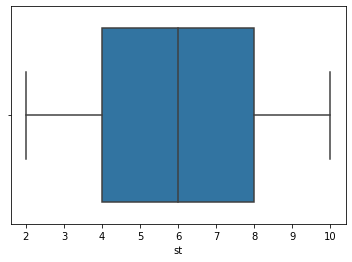

In [8]:
#Outlier Analysis
sns.boxplot(df['st'])
plt.show()
#There is no Outlier present in the data

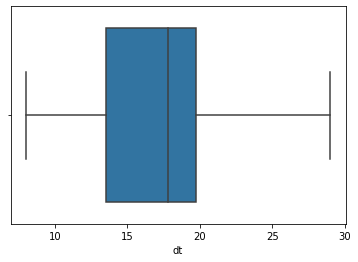

In [9]:
sns.boxplot(df['dt'])
plt.show()

# Exploratory Data Analysis

In [10]:
df.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


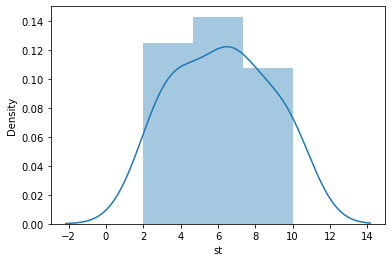

In [11]:
sns.distplot(df['st'])
plt.show()
#Distplot shows normal distribution of the data

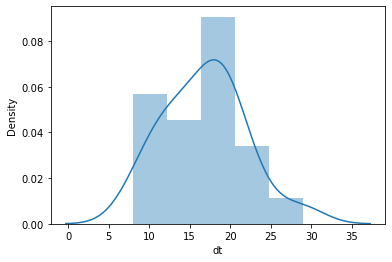

In [12]:
sns.distplot(df['dt'])
plt.show()
#Distplot shows normal distribution of the data

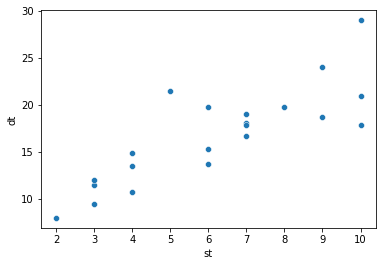

In [13]:
sns.scatterplot(x=df['st'],y=df['dt'])
plt.show()
#Scatter plot shows there is no deviation of the datapoints, and there is a positive correlation

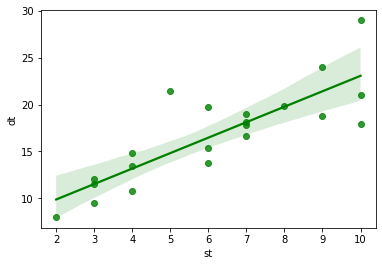

In [14]:
sns.regplot(x=df['st'],y=df['dt'], data=df, color='green')
plt.show()
#Regression plot shows here the positive correlation between dep and indep variables

### Transformations

In [15]:
def transformplot(data):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(data)
    plt.subplot(1,2,2)
    stats.probplot(x=data,dist='norm',plot=plt)
    plt.show()

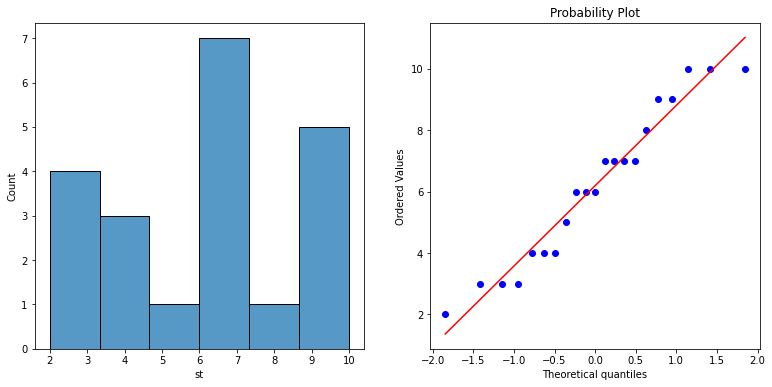

In [16]:
#Plotting actual data without any transformation
transformplot(df['st'])

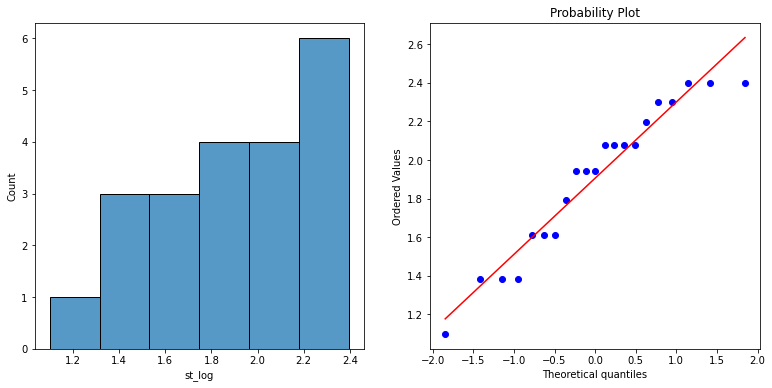

In [17]:
#Logrethemic Transformation
df['st_log']=np.log(df['st']+1)
transformplot(df['st_log'])

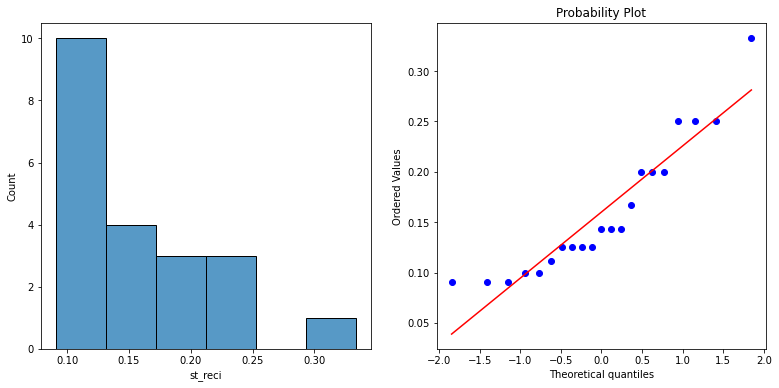

In [18]:
#Reciprocal Transformation
df['st_reci']=1/(df['st']+1)
transformplot(df['st_reci'])

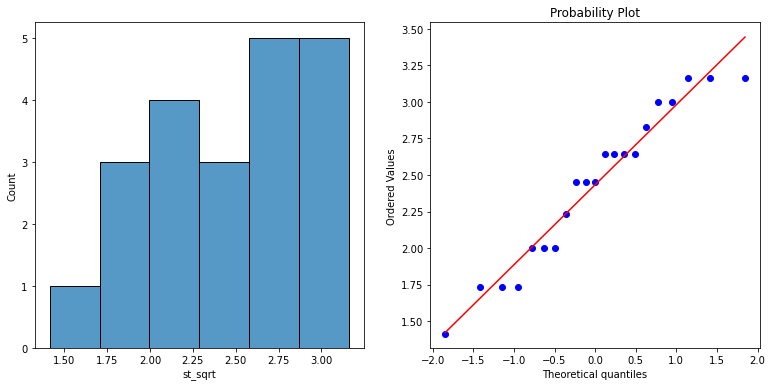

In [19]:
#Square root transformation
df['st_sqrt']=np.sqrt(df['st'])
transformplot(df['st_sqrt'])

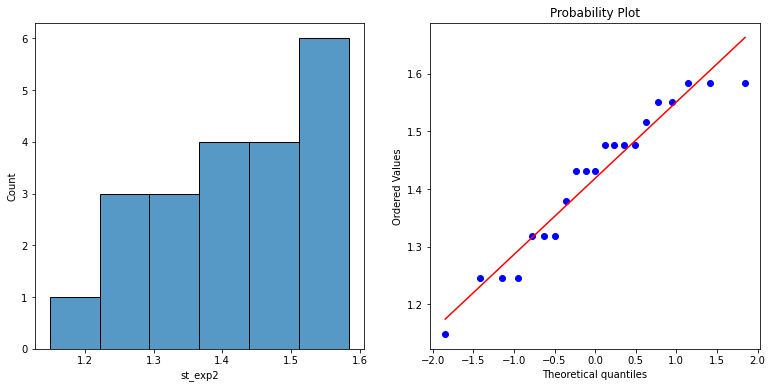

In [20]:
#Exponential Transformation
df['st_exp2']=df['st']**(1/5)
transformplot(df['st_exp2'])

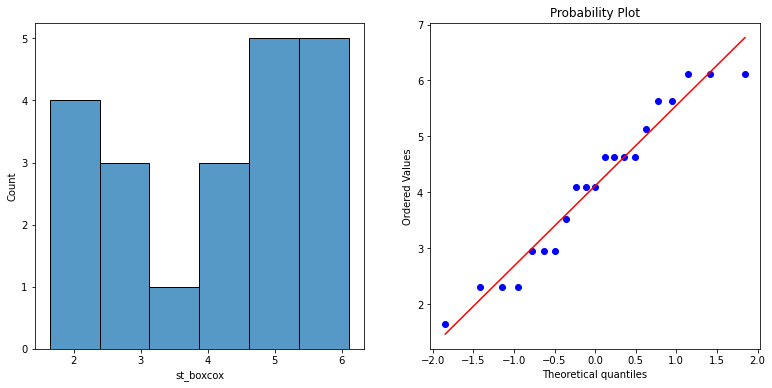

In [21]:
#boxcox Transformation
df['st_boxcox']=stats.boxcox(df['st']+1)[0]
transformplot(df['st_boxcox'])

# Model Building
Performing Simple Linear Regression

In [22]:
model=smf.ols("dt~st",data=df).fit()

In [23]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [24]:
model.pvalues

Intercept    0.001147
st           0.000004
dtype: float64

In [25]:
model.tvalues

Intercept    3.823349
st           6.387447
dtype: float64

In [26]:
print(model.summary())
#model.summary()

                            OLS Regression Results                            
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        17:32:02   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.0

# Inference
* As seen from the Regression plot, There is linear relationship between Sorting Time & Delivery Time
* As seen from the scatter plot, There is a positive correlation
* As seen from the box plot, there are no outliers in the data
* Since R squared value is 0.682, there is 68.2 % of the data fit the regression model.
* since p value is very low(0.000004<0.05), model fit is statistically significant and Sorting Time is the correct predictor for Delivery Time

# Predictions on the test data

In [27]:
ser=pd.Series([500,600])
df1=pd.DataFrame(data=ser,columns=['st'])
df1

,st
0,500
1,600


In [28]:
model.predict(df1)

0    831.092682
1    995.994672
dtype: float64

### End !!!